In [1]:
%load_ext autoreload
%autoreload 2

from src.data_processing import get_data_to_buffer, BufferDataset
from src.configs import TrainConfig

In [3]:
buffer = get_data_to_buffer(TrainConfig())

dataset = BufferDataset(buffer)

  5%|▍         | 604/13100 [00:01<00:34, 359.19it/s]


KeyboardInterrupt: 

In [11]:
from torch.utils.data import DataLoader
from functools import partial
from src.data_processing import collate_fn_tensor

loader = DataLoader(
    dataset,
    batch_size=TrainConfig.batch_expand_size * TrainConfig.batch_size,
    shuffle=True,
    collate_fn=partial(collate_fn_tensor, batch_expand_size=TrainConfig.batch_expand_size),
    drop_last=True,
    num_workers=0
)

In [13]:
batch = next(iter(loader))[0]
batch["text"].shape

torch.Size([16, 174])

In [1]:
import torch
torch.cuda.is_available()

True

In [20]:
from src.FFT import FFTBlock
import torch

hidden_size = 16
intermediate_size = 64
n_head = 4
batch_size = 4
seq_len = 12

fft_block = FFTBlock(hidden_size, intermediate_size, n_head)

inp_tensor = torch.rand(batch_size, seq_len, hidden_size, dtype=torch.float32)

out_tensor = fft_block(inp_tensor)

assert inp_tensor.shape == out_tensor.shape

torch.Size([4, 12, 16])
torch.Size([4, 12, 16])
torch.Size([4, 12, 16])


In [19]:
out_tensor.shape

torch.Size([12, 16])

In [2]:
from src.configs import TrainConfig, FastSpeech2Config, MelSpectrogramConfig
from src.training.training_loop import train, prepare

model_config = FastSpeech2Config()
train_config = TrainConfig()
mel_config = MelSpectrogramConfig()

model, train_loader, fastspeech_loss, optimizer, scheduler = prepare(model_config, train_config, mel_config)

100%|██████████| 13100/13100 [00:08<00:00, 1548.20it/s]

cost 8.47s to load all data into buffer.


In [36]:
import src.xcmyz_utils.utils as utils

WaveGlow = utils.get_WaveGlow()
WaveGlow = WaveGlow.cuda()

/opt/conda/lib/python3.8/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'glow.WaveGlow' has changed. Saved a reverse patch to WaveGlow.patch. Run `patch -p0 < WaveGlow.patch` to revert your changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.8/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. Tried to save a patch, but couldn't create a writable file ConvTranspose1d.patch. Make sure it doesn't exist and your working directory is writable.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.8/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. Saved a reverse patch to ModuleList.patch. Run `patch -p0 < ModuleList.patch` to revert your changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.8/site-packages/torch/serialization.py:7

In [54]:
from src.training.synthesis import synthesis

model.eval()
synthesis(model, WaveGlow, "Kek koksdnldj ldksfjl laj lajflasjfas lfjasj flaksfj oh yes!", "test.wav", train_config.text_cleaners)

torch.Size([1, 60]) torch.Size([1, 60])


In [13]:
train_config = TrainConfig()

In [3]:
for el in train_loader:
    break

In [42]:
db = el[0]

character = db["text"].long().to(train_config.device)
mel_target = db["mel_target"].float().to(train_config.device)
duration = db["duration"].int().to(train_config.device)
mel_pos = db["mel_pos"].long().to(train_config.device)
src_pos = db["src_pos"].long().to(train_config.device)
max_mel_len = db["mel_max_len"]

In [16]:
character.shape

torch.Size([16, 173])

In [39]:
character.shape

torch.Size([16, 172])

In [55]:
model.train()

mel_output, duration_predictor_output = model.forward(character,
                                            src_pos,
                                            mel_pos=mel_pos,
                                            mel_max_length=max_mel_len,
                                            length_target=duration)


In [45]:
duration_predictor_output.shape

torch.Size([16, 172])

In [35]:
mp

tensor([[  1,   2,   3,  ..., 867,   0,   0],
        [  1,   2,   3,  ...,   0,   0,   0],
        [  1,   2,   3,  ...,   0,   0,   0],
        ...,
        [  1,   2,   3,  ...,   0,   0,   0],
        [  1,   2,   3,  ...,   0,   0,   0],
        [  1,   2,   3,  ..., 867, 868, 869]], device='cuda:0')

In [51]:
model.eval()

mel_output = model.forward(character[:1],
                                            src_pos[:1])
                                            #mel_pos=mel_pos,
                                            #mel_max_length=max_mel_len,
                                            #length_target=duration)


k  torch.Size([1, 172, 256])
torch.Size([1, 172, 256])  . a
torch.Size([1, 172])  . o
torch.Size([1, 172])  . aa
torch.Size([1, 172, 256]) torch.Size([1, 172])  . t
torch.Size([1, 172])
bb torch.Size([1, 33, 256]) torch.Size([1, 33])


In [49]:
mel_output.shape

torch.Size([1, 33, 80])

In [7]:
mel_target.shape

torch.Size([16, 865, 80])

In [12]:
src_pos.shape

torch.Size([16, 184])

In [6]:
mel_output.shape

torch.Size([16, 865, 80])

In [6]:
model = train(train_config, model, train_loader, fastspeech_loss, optimizer, scheduler)

  0%|          | 0/1600000 [00:00<?, ?it/s]Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: broccoliman. Use `wandb login --relogin` to force relogin


  0%|          | 3000/1600000 [03:56<30:16:51, 14.65it/s]

FileNotFoundError: [Errno 2] No such file or directory: './data/model_new/checkpoint_3000.pth.tar'

In [57]:

from scipy.io import wavfile

sr, wav_data = wavfile.read("test.wav")

# audio = pn.pane.Audio(wav_data, sample_rate=sr, name='Audio', throttle=500)

In [59]:
import wandb

wandb.init(entity="broccoliman", project="TTS")

wandb.log({"whale songs": wandb.Audio(wav_data, caption="OooOoo", sample_rate=sr)})

wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: broccoliman. Use `wandb login --relogin` to force relogin


In [1]:
import pyworld

In [2]:
from src.configs import MelSpectrogramConfig, TrainConfig

In [7]:
import src.xcmyz_utils.audio.hparams_audio as audio_params

#pyworld.dio()

In [6]:
import os

beb = sorted(os.listdir("data/LJSpeech-1.1/wavs/"))

In [8]:
from scipy.io import wavfile

wav_data = wavfile.read(f"data/LJSpeech-1.1/wavs/{beb[0]}")[1]

In [25]:
import torchaudio
wav = torchaudio.load(f"data/LJSpeech-1.1/wavs/{beb[0]}")[0].squeeze(0)

In [26]:
wav

(tensor([[-7.3242e-04, -7.6294e-04, -6.4087e-04,  ...,  7.3242e-04,
           2.1362e-04,  6.1035e-05]]),
 22050)

In [22]:
stft = lambda wav: torch.stft(
    wav,
    audio_params.filter_length,
    audio_params.hop_length,
    audio_params.win_length,
    return_complex=False,
)


import numpy as np
import torch

energy = stft(wav.to(torch.float64)).square().sum((-1, 0)).sqrt()

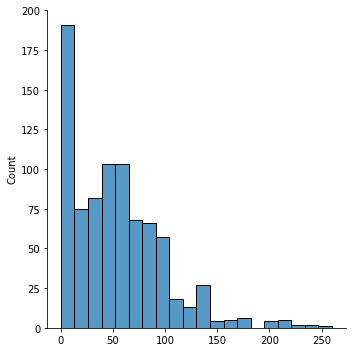

In [23]:
sns.displot(energy)

In [11]:
import numpy as np
import pyworld

wav = wav_data.astype(np.float64)

pitch, t = pyworld.dio(wav, audio_params.sampling_rate, frame_period=audio_params.hop_length * 1000 / audio_params.sampling_rate)
pitch = pyworld.stonemask(wav, pitch, t, audio_params.sampling_rate)
pitch.shape

(832,)

In [12]:
pitch

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 400.97985489, 399.09405629, 417.07634982,
       429.28466993, 435.5986787 , 434.98521216, 432.56038547,
       436.09971834, 411.58389772, 437.00324627, 445.2789364 ,
       453.8034053 , 427.42127799, 424.56398022, 424.9435847 ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       197.79629114, 186.78898275, 185.32084628, 183.00966548,
       180.14081685, 176.68042845, 175.38439123, 175.1097288 ,
       178.01018987, 178.59351332, 182.45603497, 190.96028892,
       198.20622115, 215.96909656, 232.25095207, 251.27272767,
       259.08751417, 276.81900128, 293.77151815, 313.9589748 ,
       336.27885131, 353.74283896, 363.51224529, 336.49706577,
       317.71286253, 291.17305461, 334.75697106, 294.819529  ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [30]:
from src.configs import TrainConfig

mel_gt_name = os.path.join(
            TrainConfig.mel_ground_truth, "ljspeech-mel-%05d.npy" % 1)
mel_gt_target = np.load(mel_gt_name)
mel_gt_target.shape

(832, 80)

In [17]:
import torch

torch.stft(
    torch.tensor(wav),
    audio_params.filter_length,
    audio_params.hop_length,
    audio_params.win_length,
    return_complex=False,
).square().sum((0, 2)).sqrt()

tensor([ 386886.2851,  740271.3946, 1136812.6014, 1364378.2721, 1467945.2111,
        1564832.9612, 1586009.6456, 1702217.6771, 1847315.3798, 1920373.4409,
        2099619.8851, 2363589.7446, 2777561.9044, 3186192.0572, 3472710.7370,
        3695505.0960, 3754919.3361, 3632249.8427, 3605971.6143, 3431111.8108,
        3291234.5124, 3316933.5998, 3240219.5236, 2982880.7643, 2744160.0695,
        2454858.6596, 2294554.7494, 2482661.6845, 2529579.1148, 2448488.2532,
        2199236.9618, 1947407.2139, 1799323.4933, 1822682.6115, 1758293.4464,
        1572533.4782, 1295256.8153,  887411.4722,  449279.2317,  283433.6368,
         298245.6189,  507784.6328,  890014.8069, 1351046.1651, 1815753.6913,
        2253575.3907, 2447451.1239, 2471264.1582, 2399052.6049, 2120954.0352,
        1876056.9825, 1606869.7777, 1278762.3249, 1070375.8768,  942169.4284,
         941696.8631, 1077056.1332, 1243845.2747, 1406323.2349, 1537789.7106,
        1506066.6799, 1334367.3028, 1109040.6218, 1073126.3845, 

In [14]:
pitch.shape

(563,)

In [ ]:



pitch, t = pw.dio(
            wav.numpy().astype(np.float64),
            mel_config.sampling_rate,
            frame_period=mel_config.hop_length / mel_config.sampling_rate * 1000,
        )
        pitch = pw.stonemask(wav.numpy().astype(np.float64), pitch, t, mel_config.sampling_rate)
        energy = stft(wav).square().sum((-1, 0)).sqrt()

        stft = lambda wav: 

In [1]:
from src.pitch_energy import process_all_wavs
from src.configs import TrainConfig

/repos/tts_project/src/xcmyz_utils/audio/stft.py:43: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)
/repos/tts_project/src/xcmyz_utils/audio/stft.py:130: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0.0, fmax=8000.0 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = librosa_mel_fn(


In [2]:
process_all_wavs(TrainConfig())

100%|██████████| 10/10 [00:01<00:00,  8.36it/s]


/tmp/ipykernel_401155/3956462488.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p)


<AxesSubplot:ylabel='Density'>

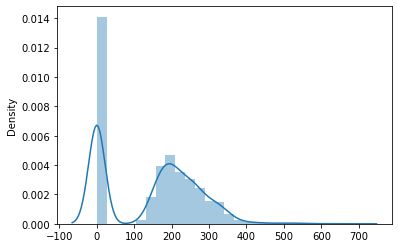

In [3]:
import seaborn as sns

sns.distplot(p)

/tmp/ipykernel_401155/353231339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e)


<AxesSubplot:ylabel='Density'>

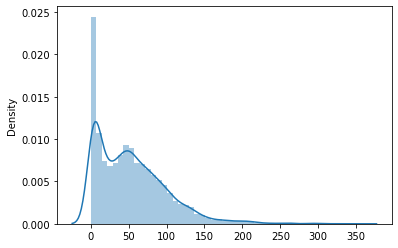

In [4]:
sns.distplot(e)

In [5]:
import numpy as np

b = np.load("data/energy/boundaries.npy")
b

array([3.17629938e-02, 4.87600768e+02])

In [6]:
b = np.load("data/pitch/boundaries.npy")
b

array([  0.        , 861.06526801])

In [5]:
np.linspace(b[0], b[1], 4)

array([7.78938104e+03, 3.85184081e+06, 7.69589223e+06, 1.15399437e+07])

----

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.configs import TrainConfig, FastSpeech2Config, MelSpectrogramConfig
from src.training.training_loop import train, prepare

model_config = FastSpeech2Config()
train_config = TrainConfig()
mel_config = MelSpectrogramConfig()

model, train_loader, fastspeech_loss, optimizer, scheduler, wave_glow = prepare(model_config, train_config, mel_config)

/repos/tts_project/src/xcmyz_utils/audio/stft.py:43: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)
/repos/tts_project/src/xcmyz_utils/audio/stft.py:130: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0.0, fmax=8000.0 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = librosa_mel_fn(
100%|██████████| 13100/13100 [00:14<00:00, 898.73it/s]
/opt/conda/lib/python3.8/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'glow.WaveGlow' has changed. Saved a reverse patch to WaveGlow.patch. Run `patch -p0 < WaveGlow.patch` to revert your changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.8/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. Saved a reverse 

cost 14.58s to load all data into buffer.


In [3]:
for el in train_loader:
    db = el[0]
    break

In [4]:
character = db["text"].long().to(train_config.device)
mel_target = db["mel_target"].float().to(train_config.device)
duration = db["duration"].int().to(train_config.device)
pitch = db["pitch"].to(train_config.device)
energy = db["energy"].to(train_config.device)
mel_pos = db["mel_pos"].long().to(train_config.device)
src_pos = db["src_pos"].long().to(train_config.device)
max_mel_len = db["mel_max_len"]

In [6]:
mel_output, \
duration_predictor_output, \
pitch_predictor_output, \
energy_predictor_output = model(character,
                                src_pos,
                                mel_pos=mel_pos,
                                mel_max_length=max_mel_len,
                                length_target=duration,
                                pitch_target=pitch,
                                energy_target=energy)

In [8]:
model.eval()

mel_output = model.forward(character[:1],
                                            src_pos[:1])
                                            #mel_pos=mel_pos,
                                            #mel_max_length=max_mel_len,
                                            #length_target=duration)

In [9]:
mel_output

tensor([[[ 3.8226, -0.1586,  0.0335, -3.0184,  0.6428, -0.2378,  2.3843,
          -0.5986, -0.9557, -3.1986, -0.3610, -0.4576, -0.2966, -0.4497,
          -1.8486, -0.9477,  0.0748,  1.3247,  2.5518,  1.1681, -0.8931,
           1.4322, -0.0532, -1.8941, -0.0218, -0.9786,  0.4298,  0.7188,
          -1.1329,  0.8971, -2.1719,  2.3884,  0.5093,  2.7380, -0.9127,
          -1.2180,  0.8754,  0.1039,  2.0895, -0.6396, -0.0058,  1.8791,
          -0.2974, -0.3626,  1.9348, -0.2229,  2.0990,  0.7752,  0.7903,
           0.1871,  0.2887,  0.2401, -0.1017, -1.4461,  1.1647, -0.4670,
          -0.4105,  0.2458, -1.2259,  0.5402,  1.8929, -0.4691, -0.0345,
           2.6794, -0.2951,  1.1316,  0.6770,  0.2211, -1.7926,  1.2302,
          -0.2564,  1.4376,  0.5413,  0.2955, -1.4620, -1.4547, -0.2332,
           0.6153,  1.6206,  0.3931],
         [ 1.8971,  1.4175,  0.8586, -3.0478,  0.5931, -0.6224,  1.5628,
           0.4056, -2.3109, -1.2273, -2.5111,  0.2113,  0.2523, -0.2765,
          -0.